In [4]:
import pandas as pd

## Getting the data

In [5]:
df=pd.read_csv('C:/Users/Administrator/Downloads/Spam/Spam/smsspamcollection/SMSSpamCollection', delimiter='\t', names=['Category','Message'])

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB


In [8]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df.shape

(5572, 2)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\administrator\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


## Visualising the data

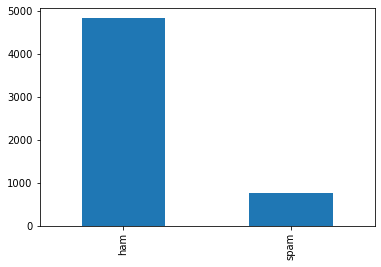

In [11]:
df['Category'].value_counts().plot(kind='bar')

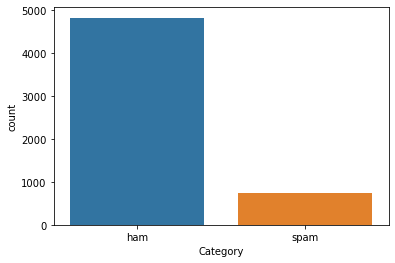

In [12]:
sns.countplot(x='Category', data=df)

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
ps=PorterStemmer()
wnl=WordNetLemmatizer()

## Cleaning the data, removing the spaces, converting in to lower form, etc 

In [15]:
corpus=[]
for i in df['Message']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()

    review = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    
    corpus.append(review)


## Using Bag of words technique

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()



In [18]:
import numpy
import sys

## Used for to show each value of array

In [19]:
numpy.set_printoptions(threshold=sys.maxsize)

In [20]:
a=pd.DataFrame(X)

In [21]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y=pd.get_dummies(df['Category'])

In [23]:
y=y.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split

## Spliting the dataset into traing and testing

In [25]:
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
X_train.shape

(4457, 1500)

In [27]:
X_test.shape

(1115, 1500)

## Using Naive Bayes algorithm

In [28]:
from sklearn.naive_bayes import MultinomialNB


In [29]:
spam_detect_model = MultinomialNB().fit(X_train, Y_train)

In [30]:
y_pred=spam_detect_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(Y_test, y_pred)

array([[946,   9],
       [ 11, 149]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(Y_test, y_pred)

0.9820627802690582

## Using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression 

In [36]:
LR_model=LogisticRegression()

In [37]:
LR_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred_LR=LR_model.predict(X_test)

In [41]:
confusion_matrix(Y_test,y_pred_LR)

array([[955,   0],
       [ 16, 144]], dtype=int64)

In [42]:
accuracy_score(Y_test, y_pred_LR)

0.9856502242152466